# Física Nuclear y de Partículas #

## Tema 4. Desintegración nuclear.  ##

César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Septiembre 2024


Contenidos:

- Isótopos estables del Talio
- Ley de desintegración radiactiva
- Ecuaciones de una cadena radiactiva de tres núcleos
- Radiactividad artificial

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
from matplotlib.patches import Ellipse

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n'] + df['z']

uma = 931.4941024/1000000/1000

Isótopos estables del Talio. Para la cadena del Neptunio
Pb-209 (beta, 3,3 h) -> Bi-209 -> Tl-205
El Bismuto 209 aparece como estable en el libro de Hodgson, Gadioli, Gadioli-Erba, en realidad no lo es
Talio 205

In [7]:
#dfTl = df.loc[ ((df['symbol']=="Tl") & (df['half_life']=='STABLE'))] 
#print(dfTl['A'])
#print(dashes)
#print(dfTl)

dfBi = df.loc[ ((df['symbol']=="Bi") & (df['A']==209))] 
print(dashes)
print('Vida media del',dfBi['symbol'].values[0],dfBi['A'].values[0],':',dfBi['half_life'].values[0],dfBi['unit_hl'].values[0])
print('Decaimiento principal:',dfBi['decay_1'].values[0])
print('Decaimiento secundario:',dfBi['decay_2'].values[0])
print('Z=',dfBi['z'].values[0],'N=',dfBi['n'].values[0])
dfBi = df.loc[ ((df['symbol']=="Tl") & (df['A']==205))] 
print(dashes)
print('Vida media del',dfBi['symbol'].values[0],dfBi['A'].values[0],':',dfBi['half_life'].values[0],dfBi['unit_hl'].values[0])
print('Z=',dfBi['z'].values[0],'N=',dfBi['n'].values[0])
#print('Decaimiento principal:',dfBi['decay_1'].values[0])
#print('Decaimiento secundario:',dfBi['decay_2'].values[0])

------------------------------------------------------------
Vida media del Bi 209 : 2.01E19 Y
Decaimiento principal: A
Decaimiento secundario: nan
Z= 83 N= 126
------------------------------------------------------------
Vida media del Tl 205 : STABLE nan
Z= 81 N= 124


Ley de desintegración radiactiva

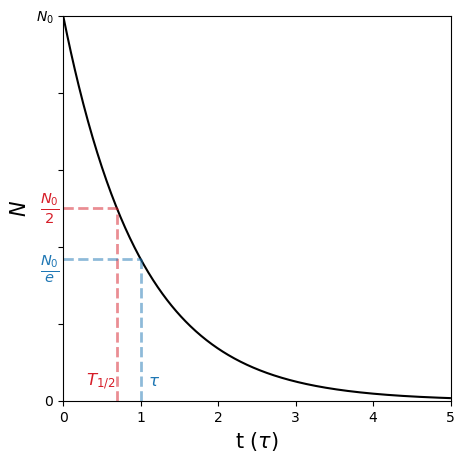

In [8]:
def decay(N0,tau,t):
    return N0*np.exp(-t/tau)

N0 = 1000
fig = plt.figure(figsize=(5,5))
tmin, tmax, tstep = 0, 5, 0.01
t = np.arange(tmin, tmax, tstep)
plt.xlim((tmin, tmax))
plt.ylim((0., 1000))
plt.ylabel(r'$N$', fontsize=15)
plt.xlabel(r't ($\tau$)', fontsize=15)
plt.plot(t, decay(N0, 1, t),'-', c=jpac_color[10])
plt.hlines(500, 0, 1*np.log(2), colors=jpac_color[1], lw=2., linestyles='dashed', alpha=0.5)
plt.vlines(np.log(2), 0, 500, colors=jpac_color[1], lw=2., linestyles='dashed', alpha=0.5)
plt.text(np.log(2)-0.4,40,r'$T_{1/2}$',c=jpac_color[1],fontsize=12)
plt.text(-0.3,482,r'$\frac{N_0}{2}$',c=jpac_color[1],fontsize=15)
plt.hlines(decay(N0,1,1), 0, 1, colors=jpac_color[0], lw=2., linestyles='dashed', alpha=0.5)
plt.vlines(1, 0, N0/np.exp(1), colors=jpac_color[0], lw=2., linestyles='dashed', alpha=0.5)
plt.text(1.1,40,r'$\tau$',c=jpac_color[0],fontsize=12)
plt.text(-0.3,320,r'$\frac{N_0}{e}$',c=jpac_color[0],fontsize=15)
plt.yticks([1000,800,600,400,200,0],[r'$N_0$',' ',' ',' ',' ', '0'])
plt.show()
#fig.savefig("leydedecaimiento.pdf", bbox_inches='tight')

Ecuaciones de una cadena radiactiva de tres núcleos

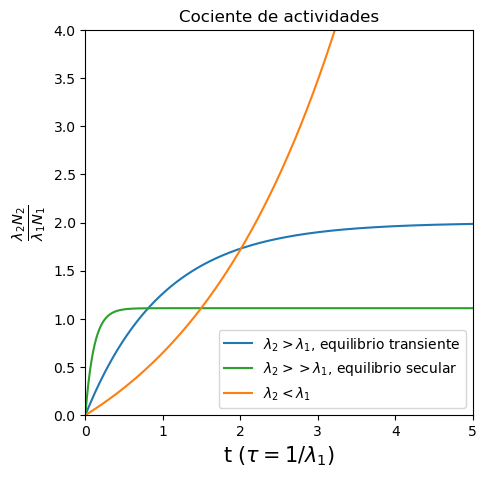

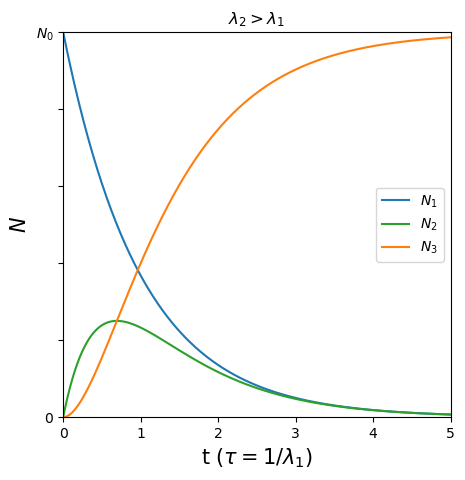

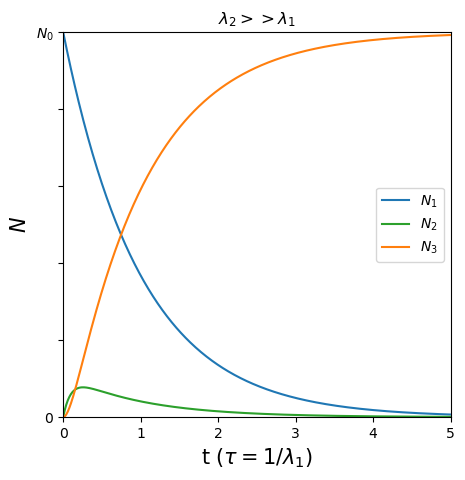

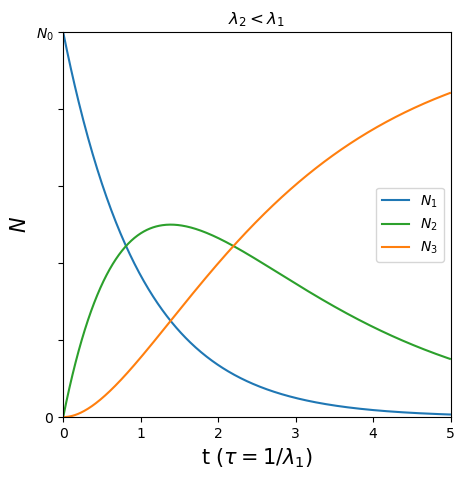

In [ ]:
def N1decay(N0,lambda1,t):
    return decay(N0,1./lambda1,t)

def N2decay(N0,lambda1,lambda2,t):
    return N0*lambda1/(lambda2-lambda1)*( np.exp(-lambda1*t)-np.exp(-lambda2*t))

def N3decay(N0,lambda1,lambda2,t):
    return N0*( 1. + 1./(lambda2-lambda1)*(  lambda1*np.exp(-lambda2*t) - lambda2*np.exp(-lambda1*t)) )

def ratio(N0,lambda1,lambda2,t):
    return lambda2*N2decay(N0,lambda1,lambda2,t)/(lambda1*N1decay(N0,lambda1,t))

N0 = 1000
lambda1a, lambda2a  = 1. , 2.
lambda1b, lambda2b  = 1. , 10.
lambda1c, lambda2c  = 1. , 0.5

tmin, tmax, tstep = 0, 5, 0.01
t = np.arange(tmin, tmax, tstep)
tau = 1./lambda1a

#   Actividades
fig = plt.figure(figsize=(5,5))
plt.xlim((tmin, tmax))
plt.ylim((0., 4))
plt.ylabel(r'$\frac{\lambda_2 N_2}{\lambda_1 N_1}$', fontsize=15)
plt.xlabel(r't ($\tau = 1/\lambda_1$)', fontsize=15)
plt.title(r'Cociente de actividades')
plt.plot(t, ratio(N0, lambda1a, lambda2a, t),'-', c=jpac_color[0],label = '$\lambda_2 > \lambda_1$, equilibrio transiente')
plt.plot(t, ratio(N0, lambda1b, lambda2b, t),'-', c=jpac_color[2],label = '$\lambda_2 >> \lambda_1$, equilibrio secular')
plt.plot(t, ratio(N0, lambda1c, lambda2c, t),'-', c=jpac_color[3],label = '$\lambda_2 < \lambda_1$')
plt.legend(loc='lower right',ncol=1,frameon=True)
plt.show()
#fig.savefig("actividaddedecaimiento.pdf", bbox_inches='tight')

#   Caso lambda2 > lambda1
lambda1, lambda2  = lambda1a, lambda2a 
tau = 1./lambda1
fig = plt.figure(figsize=(5,5))
plt.xlim((tmin, tmax))
plt.ylim((0., 1000))
plt.ylabel(r'$N$', fontsize=15)
plt.xlabel(r't ($\tau = 1/\lambda_1$)', fontsize=15)
plt.title(r'$\lambda_2>\lambda_1$')
plt.plot(t, N1decay(N0, lambda1, t),'-', c=jpac_color[0], label = '$N_1$')
plt.plot(t, N2decay(N0, lambda1, lambda2, t),'-', c=jpac_color[2],label = '$N_2$')
plt.plot(t, N3decay(N0, lambda1, lambda2, t),'-', c=jpac_color[3],label = '$N_3$')
plt.yticks([1000,800,600,400,200,0],[r'$N_0$',' ',' ',' ',' ', '0'])
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()
#fig.savefig("cadenadedecaimiento1.pdf", bbox_inches='tight')

#   Caso lambda2 >> lambda1
lambda1, lambda2  = lambda1b, lambda2b 
tau = 1./lambda1
fig = plt.figure(figsize=(5,5))
plt.xlim((tmin, tmax))
plt.ylim((0., 1000))
plt.ylabel(r'$N$', fontsize=15)
plt.xlabel(r't ($\tau = 1/\lambda_1$)', fontsize=15)
plt.title(r'$\lambda_2>>\lambda_1$')
plt.plot(t, N1decay(N0, lambda1, t),'-', c=jpac_color[0], label = '$N_1$')
plt.plot(t, N2decay(N0, lambda1, lambda2, t),'-', c=jpac_color[2],label = '$N_2$')
plt.plot(t, N3decay(N0, lambda1, lambda2, t),'-', c=jpac_color[3],label = '$N_3$')
plt.yticks([1000,800,600,400,200,0],[r'$N_0$',' ',' ',' ',' ', '0'])
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()
#fig.savefig("cadenadedecaimiento2.pdf", bbox_inches='tight')

#   Caso lambda2 < lambda1
lambda1, lambda2  = lambda1c, lambda2c 
tau = 1./lambda1
fig = plt.figure(figsize=(5,5))
plt.xlim((tmin, tmax))
plt.ylim((0., 1000))
plt.ylabel(r'$N$', fontsize=15)
plt.xlabel(r't ($\tau = 1/\lambda_1$)', fontsize=15)
plt.title(r'$\lambda_2<\lambda_1$')
plt.plot(t, N1decay(N0, lambda1, t),'-', c=jpac_color[0], label = '$N_1$')
plt.plot(t, N2decay(N0, lambda1, lambda2, t),'-', c=jpac_color[2],label = '$N_2$')
plt.plot(t, N3decay(N0, lambda1, lambda2, t),'-', c=jpac_color[3],label = '$N_3$')
plt.yticks([1000,800,600,400,200,0],[r'$N_0$',' ',' ',' ',' ', '0'])
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()
#fig.savefig("cadenadedecaimiento3.pdf", bbox_inches='tight')


Radiactividad artificial

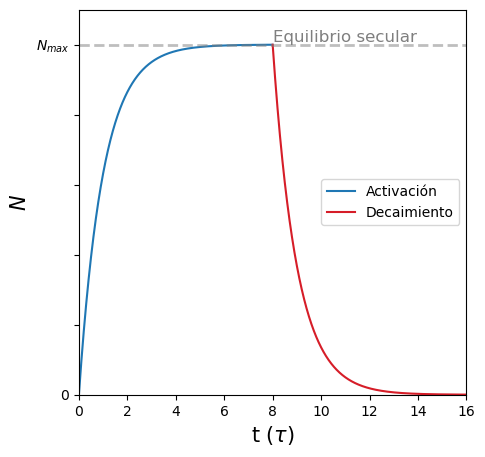

In [10]:
def Aartificial(R,lambda1,t):
    return R*(1.-np.exp(-lambda1*t))
def Nartificial(R,lambda1,t):
    return Aartificial(R,lambda1,t)/lambda1

R = 1000
lambda1 = 1
tmin, tmax, tstep = 0, 8, 0.01
t0 = np.arange(tmin, tmax, tstep)
t1 = np.arange(tmax, 2*tmax, tstep)
tau = 1./lambda1a
T = t1-tmax
fig = plt.figure(figsize=(5,5))
plt.xlim((tmin, 2*tmax))
plt.ylim((0., 100+Nartificial(R,lambda1,tmax)))
plt.ylabel(r'$N$', fontsize=15)
plt.xlabel(r't ($\tau$)', fontsize=15)
plt.plot(t0, Nartificial(R,lambda1,t0),'-', c=jpac_color[0], label = 'Activación')
plt.plot(t1, N1decay(Nartificial(R,lambda1,tmax),lambda1,T),'-', c=jpac_color[1], label = 'Decaimiento')
plt.yticks([1000,800,600,400,200,0],[r'$N_{max}$',' ',' ',' ',' ', '0'])
plt.hlines(Nartificial(R,lambda1,tmax), 0, 2*tmax, colors=jpac_color[9], lw=2., linestyles='dashed', alpha=0.5)
plt.text(tmax,Nartificial(R,lambda1,tmax)+10,'Equilibrio secular',c=jpac_color[9],fontsize=12)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()
#fig.savefig("artificial.pdf", bbox_inches='tight')
